In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
marvel_movies = pd.read_csv("mcu_box_office.csv")

In [28]:
marvel_movies.shape

(27, 10)

In [29]:
marvel_movies.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


In [30]:
marvel_movies.describe()

,mcu_phase,tomato_meter,audience_score,movie_duration
count,27.000000,27.000000,27.000000,27.000000
mean,2.481481,83.555556,83.740741,131.925926
std,1.014145,11.112479,11.002072,15.531422
min,1.000000,47.000000,45.000000,111.000000
25%,2.000000,79.000000,78.000000,122.500000
50%,3.000000,87.000000,87.000000,130.000000
75%,3.000000,91.500000,91.000000,138.000000
max,4.000000,96.000000,98.000000,181.000000


In [31]:
marvel_movies.isna().any()

movie_title             False
mcu_phase               False
release_date            False
tomato_meter            False
audience_score          False
movie_duration          False
production_budget       False
opening_weekend         False
domestic_box_office     False
worldwide_box_office    False
dtype: bool

In [32]:
marvel_movies.dtypes

movie_title             object
mcu_phase                int64
release_date            object
tomato_meter             int64
audience_score           int64
movie_duration           int64
production_budget       object
opening_weekend         object
domestic_box_office     object
worldwide_box_office    object
dtype: object

In [33]:
#convert budjects to numbers
marvel_movies['production_budget'] = marvel_movies['production_budget'].str.split(
    ',').str.join("").astype(float)
marvel_movies['opening_weekend'] = marvel_movies['opening_weekend'].str.split(
    ',').str.join("").astype(float)
marvel_movies['domestic_box_office'] = marvel_movies['domestic_box_office'].str.split(
    ',').str.join("").astype(float)
marvel_movies['worldwide_box_office'] = marvel_movies['worldwide_box_office'].str.split(
    ',').str.join("").astype(float)

In [21]:
#Converting Release date to datetime object.¶
marvel_movies.release_date = pd.to_datetime(marvel_movies.release_date)

In [35]:
marvel_movies.dtypes

movie_title              object
mcu_phase                 int64
release_date             object
tomato_meter              int64
audience_score            int64
movie_duration            int64
production_budget       float64
opening_weekend         float64
domestic_box_office     float64
worldwide_box_office    float64
dtype: object

In [36]:
marvel_movies.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,186000000.0,102118668.0,318604126.0,585171547.0
1,The Incredible Hulk,1,6/13/2008,67,70,112,137500000.0,55414050.0,134806913.0,265573859.0
2,Iron Man 2,1,5/7/2010,72,71,124,170000000.0,128122480.0,312433331.0,621156389.0
3,Thor,1,5/6/2011,77,76,113,150000000.0,65723338.0,181030624.0,449326618.0
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,140000000.0,65058524.0,176654505.0,370569776.0


In [22]:
#Does the data contain any duplicate rows?¶
marvel_movies.duplicated().any()

False

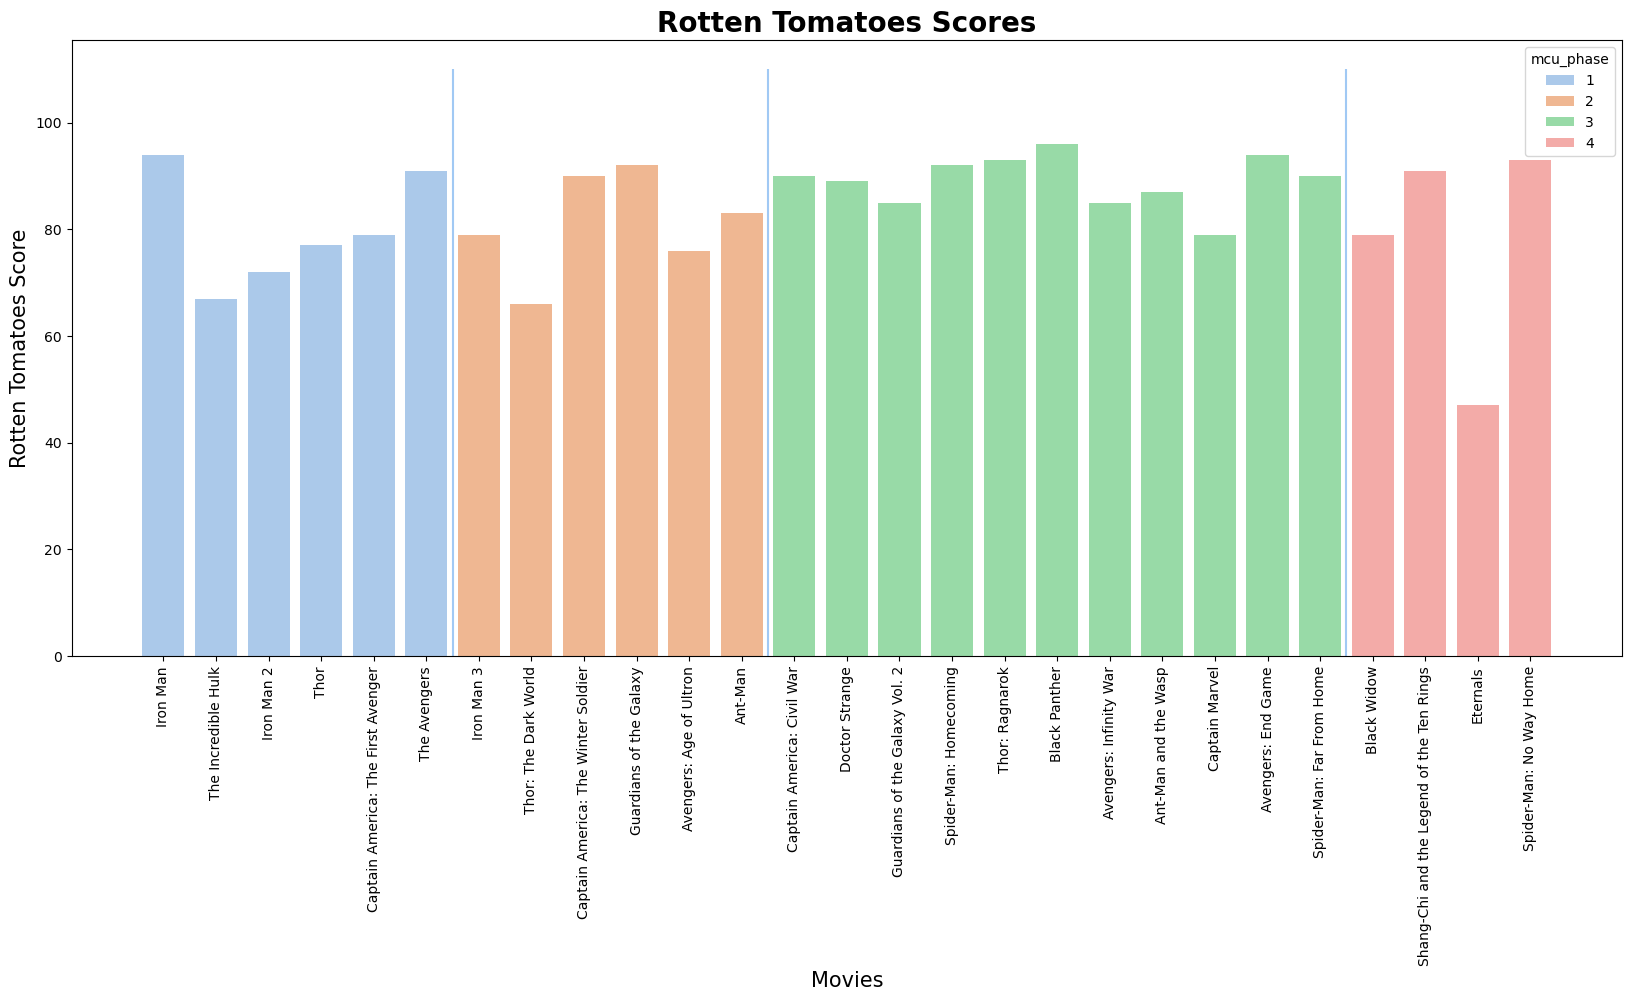

In [85]:
plt.figure(figsize =(20,8))
plt.xticks(rotation = 90)
sns.set_palette("pastel")
sns.barplot(x="movie_title", y="tomato_meter",
            data=marvel_movies, hue="mcu_phase", dodge=False)
plt.title("Rotten Tomatoes Scores", fontsize = 20, fontweight = "bold")
plt.xlabel("Movies", fontsize = 15)
plt.ylabel("Rotten Tomatoes Score",fontsize = 15)
plt.vlines(x=(5.5, 11.5, 22.5), ymin=0, ymax=110)

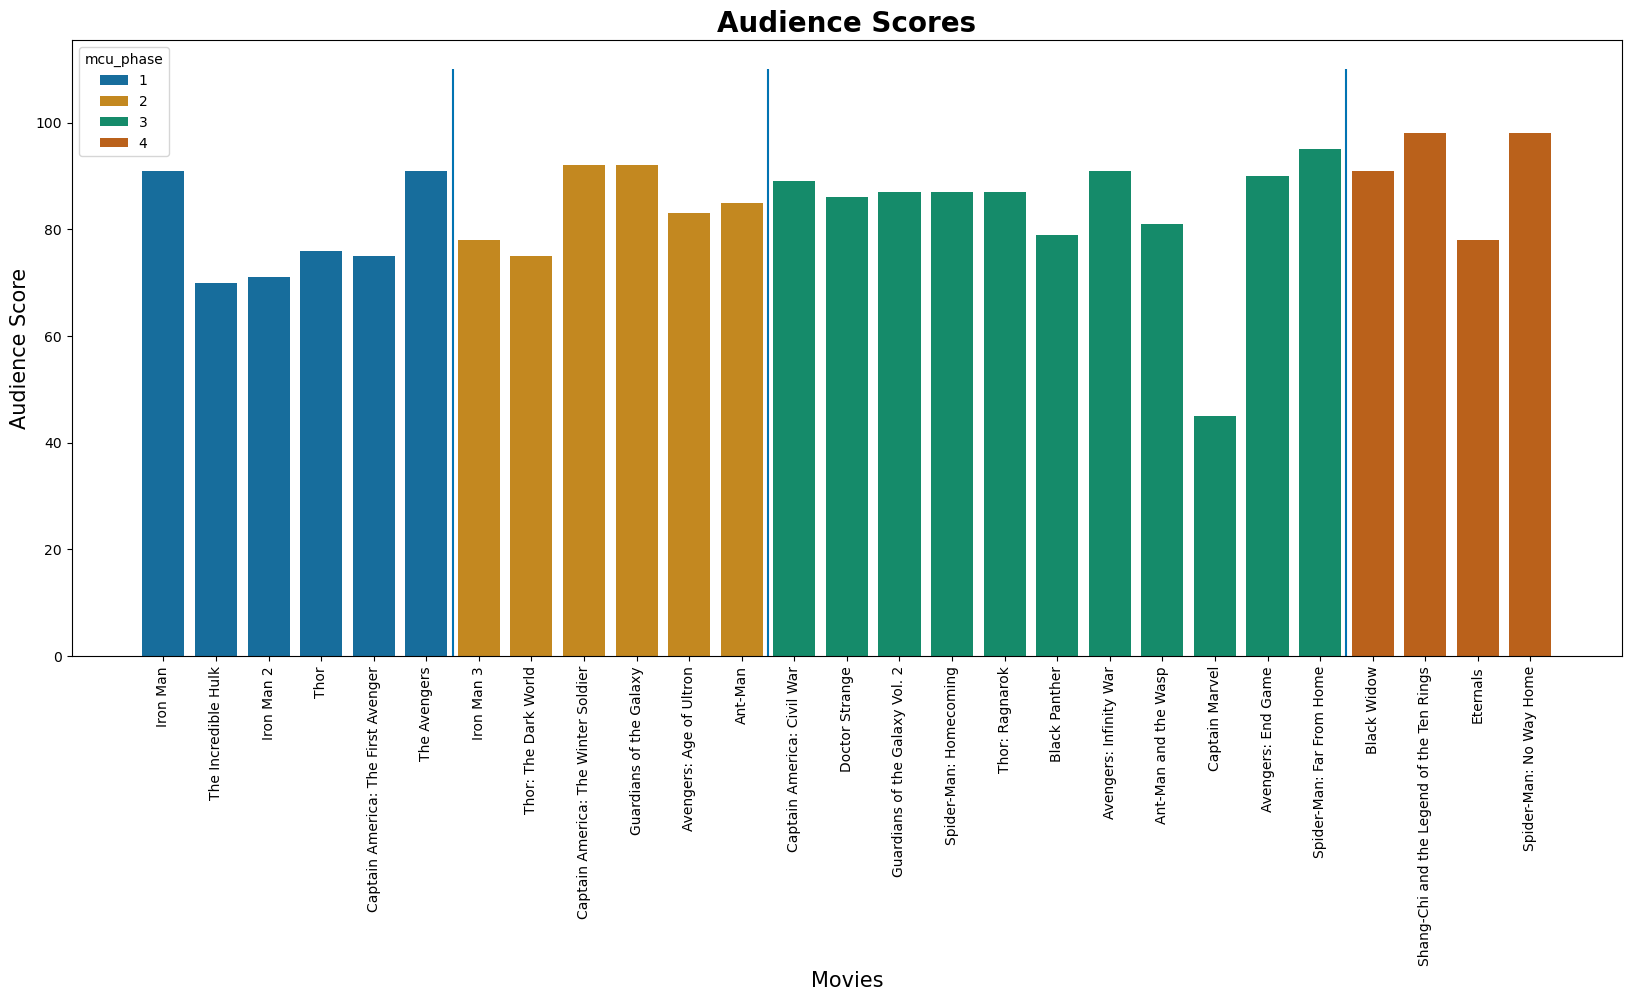

In [87]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.set_palette("colorblind")
sns.barplot(x="movie_title", y="audience_score",
            data=marvel_movies, hue="mcu_phase", dodge=False)
plt.title("Audience Scores", fontsize=20, fontweight="bold")
plt.xlabel("Movies", fontsize=15)
plt.ylabel("Audience Score", fontsize=15)
plt.vlines(x=(5.5, 11.5, 22.5), ymin=0, ymax=110)

Text(0, 0.5, 'Score')

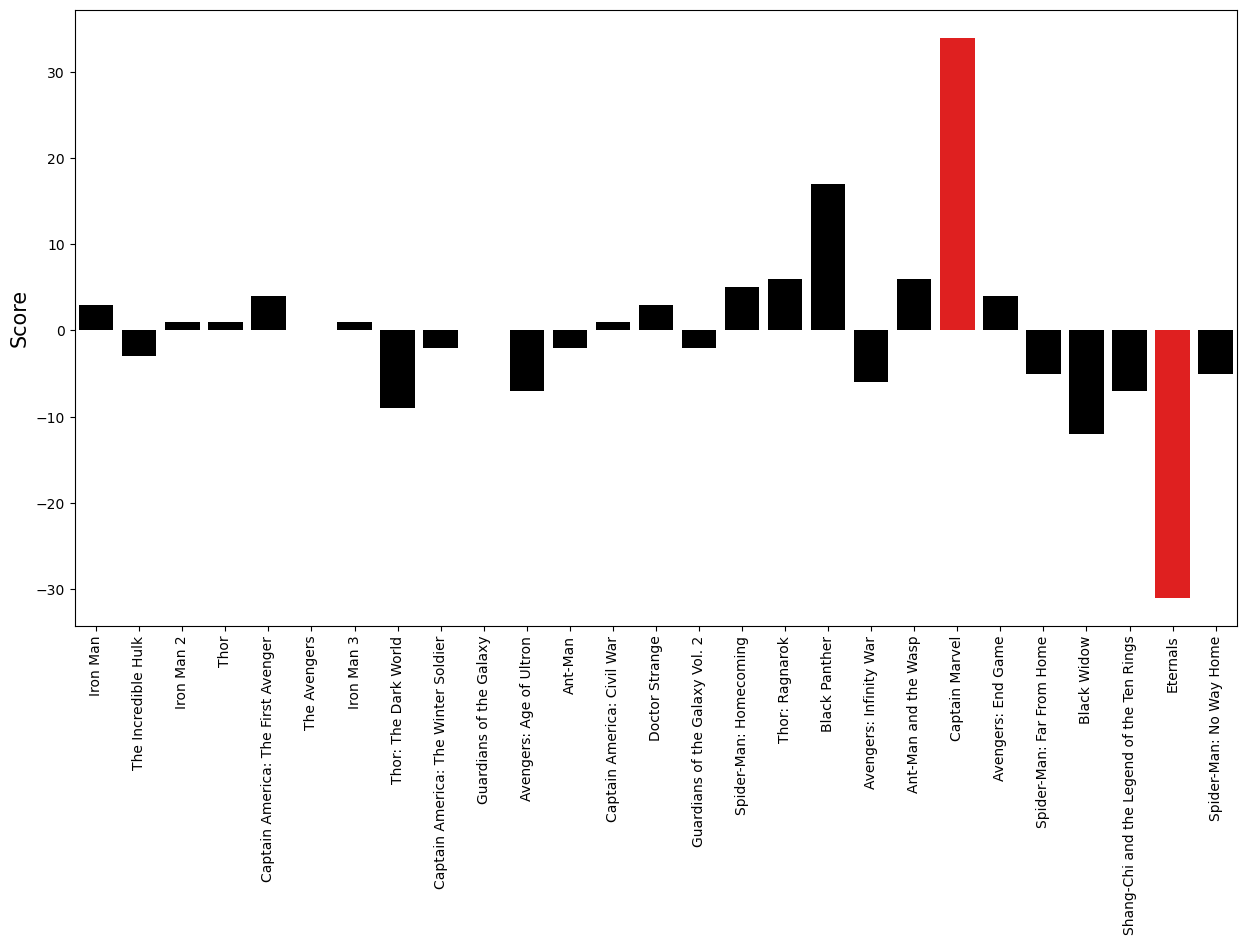

In [43]:
#How different movies split RT critics vs Audience
#Positive Value = Higher rotten tomatoes score Negative Value = Higher Audience score
marvel_movies["score_difference"] = marvel_movies["tomato_meter"] - \
    marvel_movies["audience_score"]
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)

clrs = ['black' if (min(marvel_movies.score_difference) < x < max(marvel_movies.score_difference)) else 'red' for x in marvel_movies.score_difference]

sns.barplot(x="movie_title", y="score_difference",
            data=marvel_movies, palette=clrs, dodge=False)

plt.xlabel("")
plt.ylabel("Score", fontsize=15)

Text(0, 0.5, '')

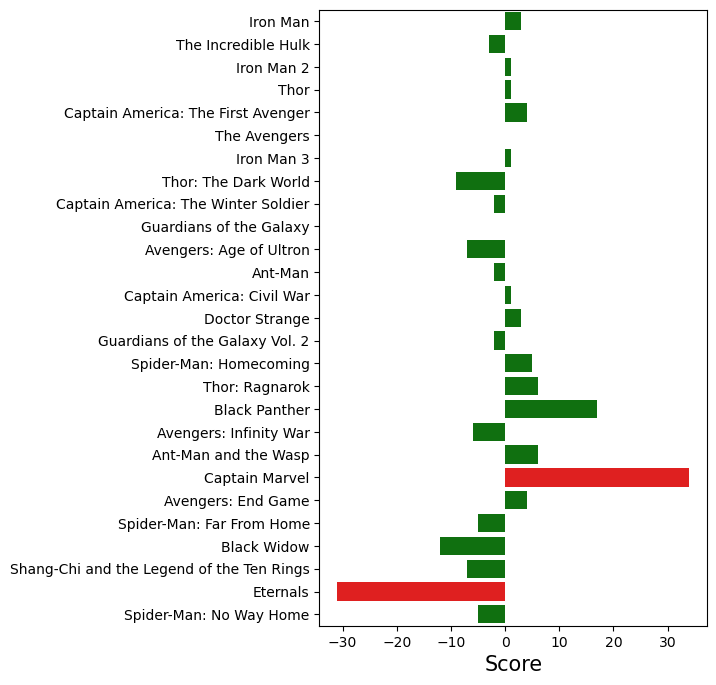

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

marvel_movies["score_difference"] = marvel_movies["tomato_meter"] - marvel_movies["audience_score"]
plt.figure(figsize=(5, 8))

clrs = ['green' if (min(marvel_movies.score_difference) < x < max(marvel_movies.score_difference)) else 'red' for x in marvel_movies.score_difference]

sns.barplot(x="score_difference", y="movie_title", data=marvel_movies, palette=clrs, dodge=False)

plt.xlabel("Score", fontsize=15)
plt.ylabel("")


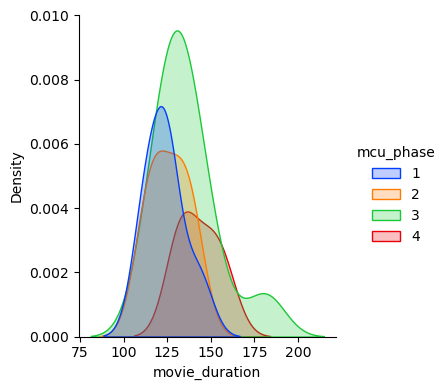

In [55]:
#How long were the movies?¶
sns.displot(data=marvel_movies, x='movie_duration', hue='mcu_phase', kind='kde',
            fill=True, palette=sns.color_palette('bright')[:4], height=4, aspect=0.9)

<AxesSubplot:xlabel='movie_title', ylabel='movie_duration'>

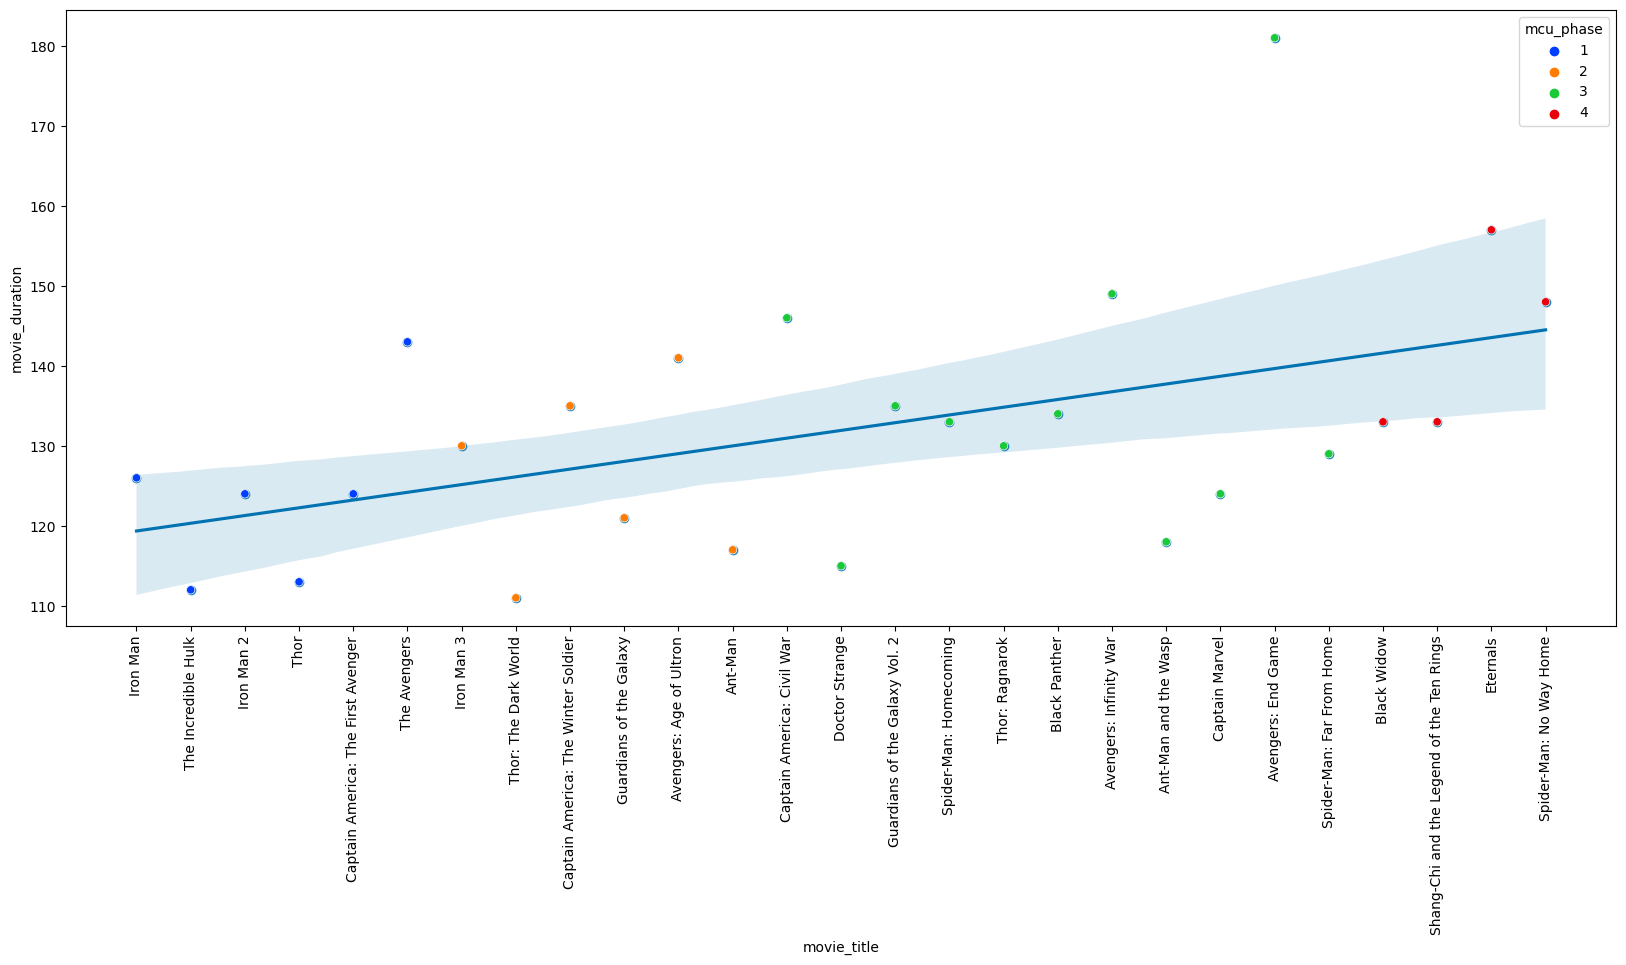

In [107]:
#Have the movies gotten longer?
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.regplot(x=marvel_movies.index, y="movie_duration", data=marvel_movies)
sns.scatterplot(data=marvel_movies, x="movie_title",
                y="movie_duration", hue="mcu_phase", palette=sns.color_palette('bright')[:4])


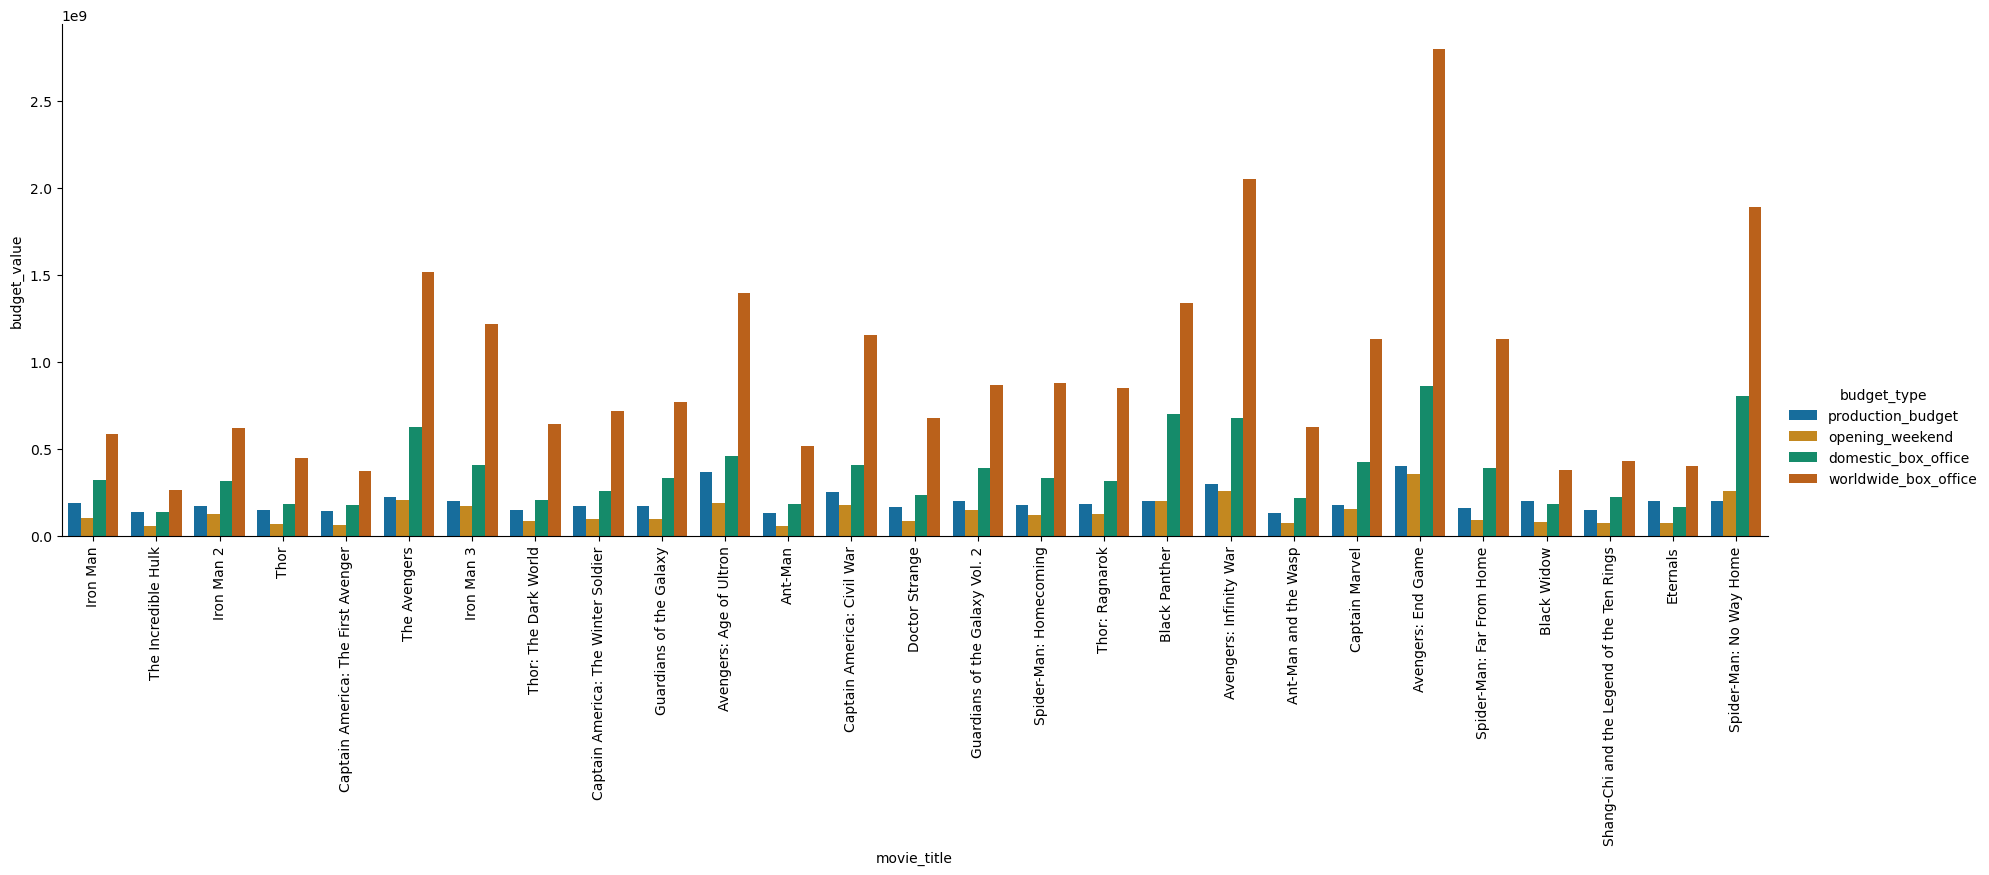

In [110]:
#How much money did the movies make?¶
budget = pd.melt(marvel_movies, id_vars=("movie_title", "mcu_phase"), value_vars=(
    "production_budget", "opening_weekend", "domestic_box_office", "worldwide_box_office"), value_name="budget_value", var_name="budget_type")
g = sns.catplot(x="movie_title", y="budget_value",
                data=budget, hue="budget_type", kind="bar", dodge=True, sharex=False, aspect=3, height=6)
g.set_xticklabels(rotation = 90)

<AxesSubplot:xlabel='movie_title', ylabel='production_budget'>

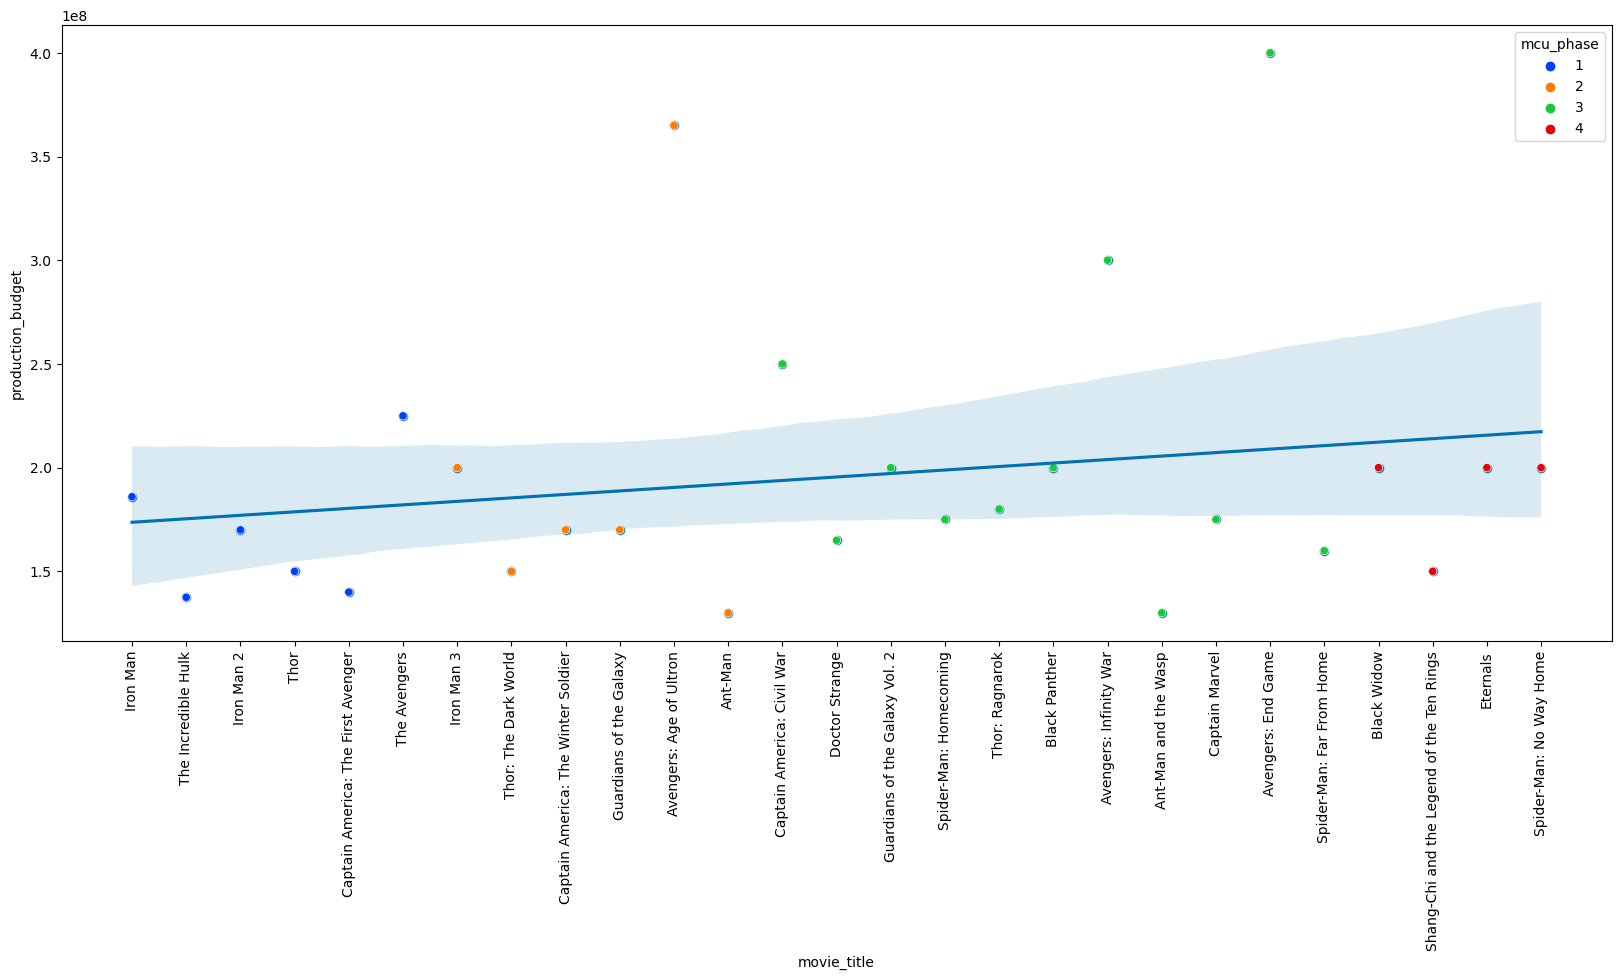

In [112]:
#How did the cost of making marvel movies change overtime?¶
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.regplot(x=marvel_movies.index, y="production_budget", data=marvel_movies)
sns.scatterplot(data=marvel_movies, x="movie_title",
                y="production_budget", hue="mcu_phase", palette=sns.color_palette('bright')[:4])

<AxesSubplot:xlabel='movie_title', ylabel='worldwide_box_office'>

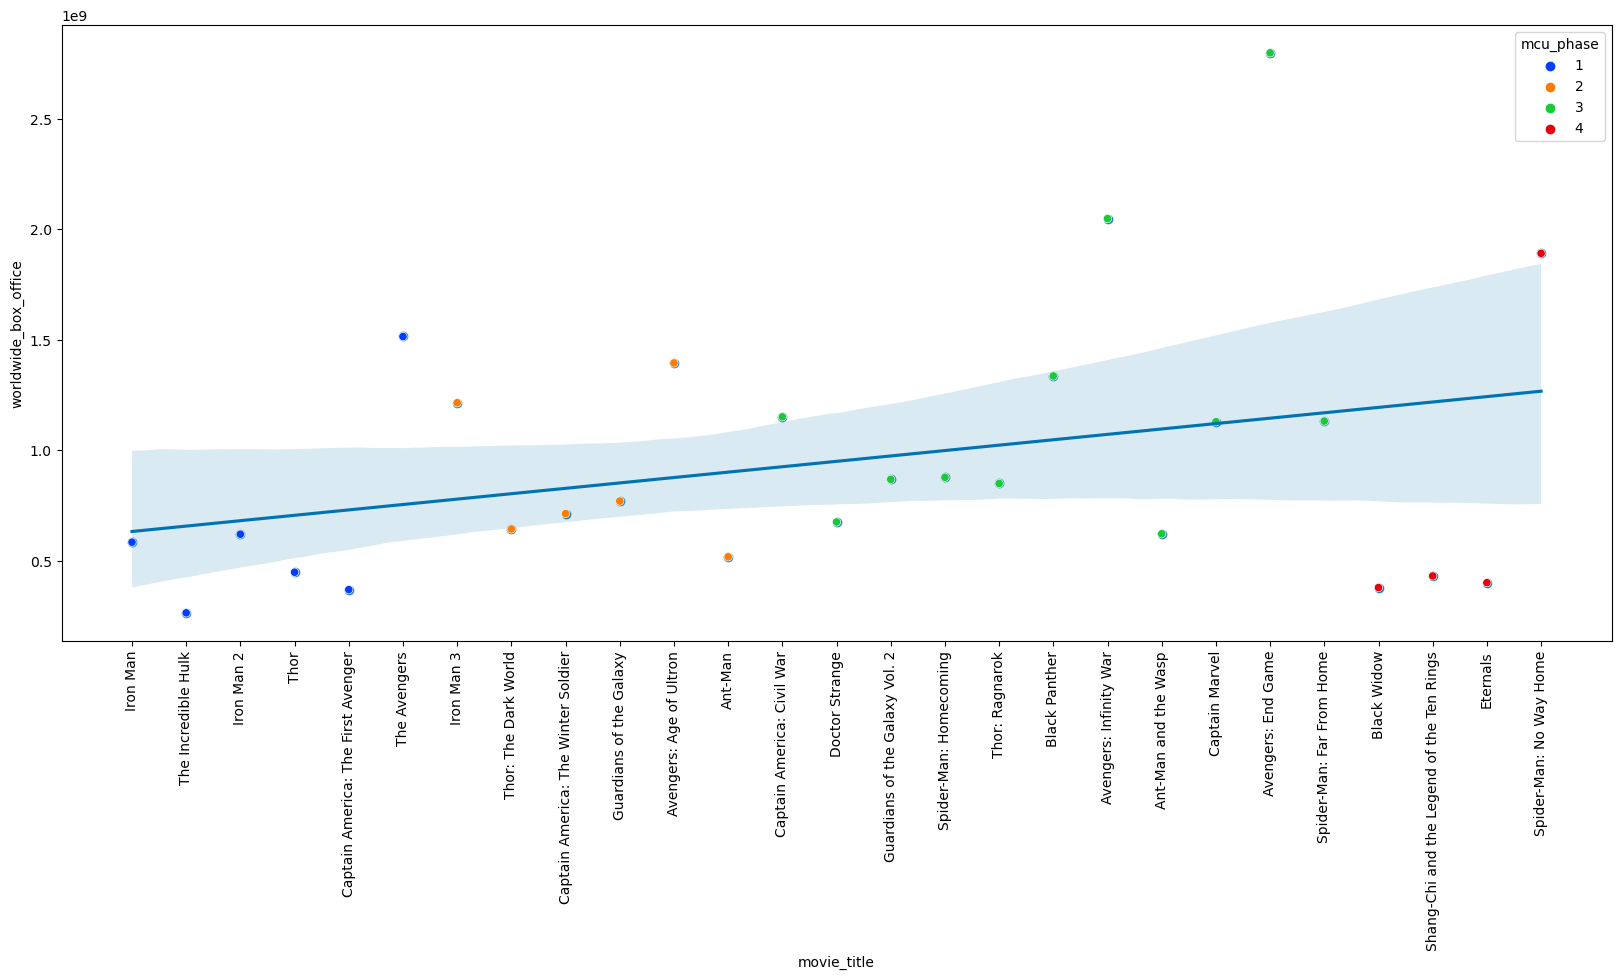

In [113]:
#How does the revenue generated change over time?¶
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.regplot(x=marvel_movies.index, y="worldwide_box_office", data=marvel_movies)
sns.scatterplot(data=marvel_movies, x="movie_title",
                y="worldwide_box_office", hue="mcu_phase", palette=sns.color_palette('bright')[:4])


<AxesSubplot:xlabel='movie_title', ylabel='percent_profit_margin'>

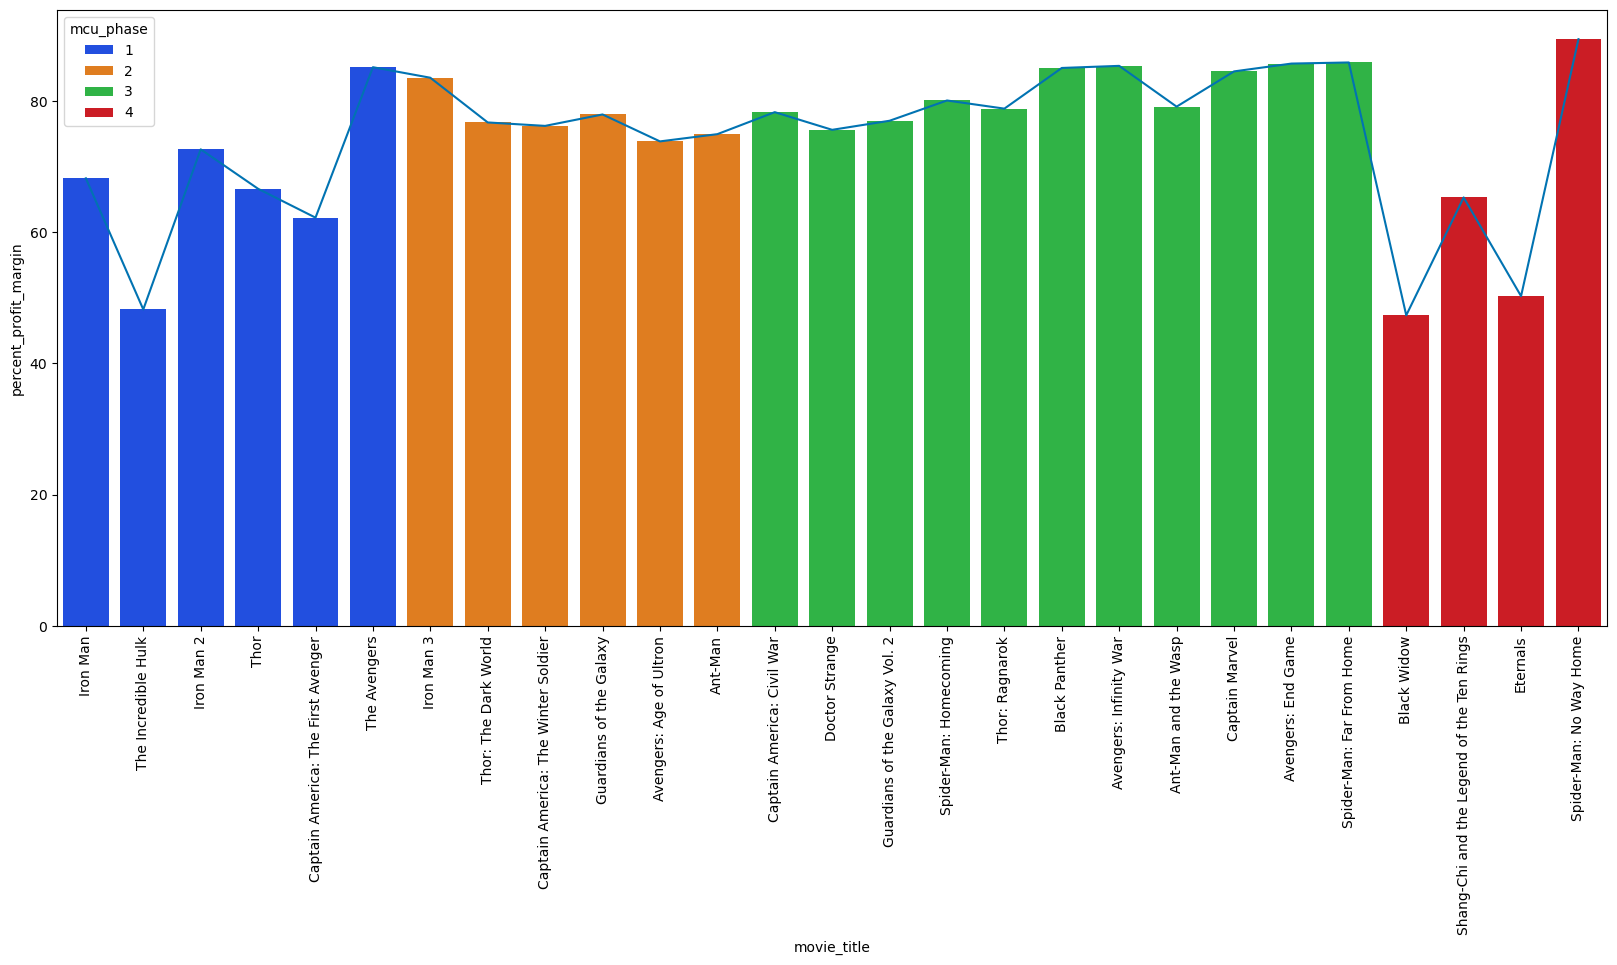

In [114]:
#Lets look at the profit margin¶
marvel_movies["percent_profit_margin"] = (
    (marvel_movies["worldwide_box_office"] - marvel_movies["production_budget"])/marvel_movies["worldwide_box_office"])*100
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.lineplot(x=marvel_movies.index,
            y="percent_profit_margin", data=marvel_movies)
sns.barplot(data=marvel_movies, x="movie_title",
                y="percent_profit_margin", hue="mcu_phase", palette=sns.color_palette('bright')[:4], dodge=False)

<AxesSubplot:xlabel='movie_title'>

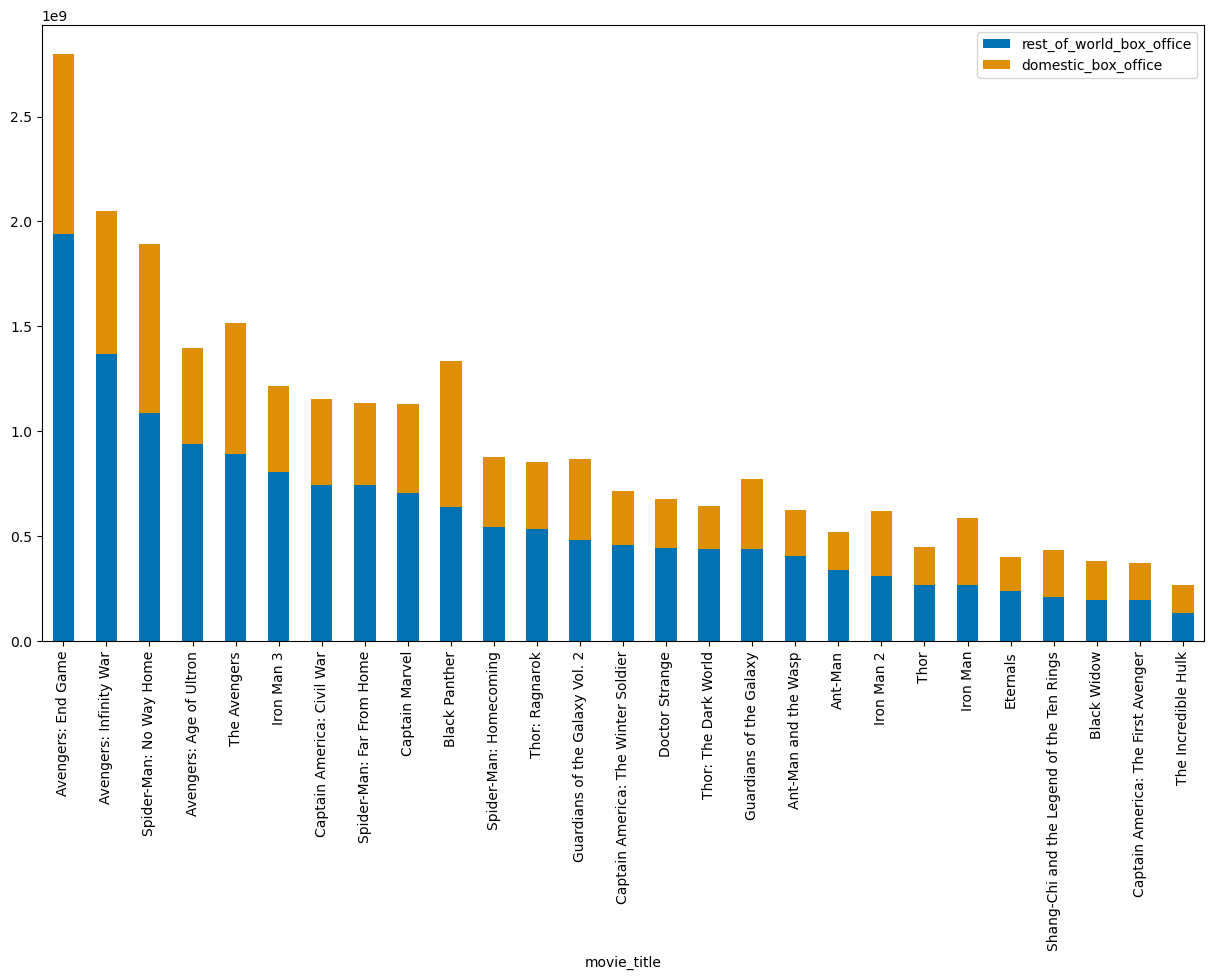

In [116]:
#Breaking down the best performing movies by their domestic vs international box office revenue¶
marvel_movies["rest_of_world_box_office"] = marvel_movies["worldwide_box_office"] - \
    marvel_movies["domestic_box_office"]
box_office = marvel_movies[["movie_title", "rest_of_world_box_office", "domestic_box_office"]]
box_office = box_office.sort_values(
    "rest_of_world_box_office", ascending=False)
box_office_plot = box_office.set_index('movie_title').plot(kind='bar', stacked=True,
                                                           figsize=(15, 8))
box_office_plot

<AxesSubplot:xlabel='audience_score', ylabel='worldwide_box_office'>

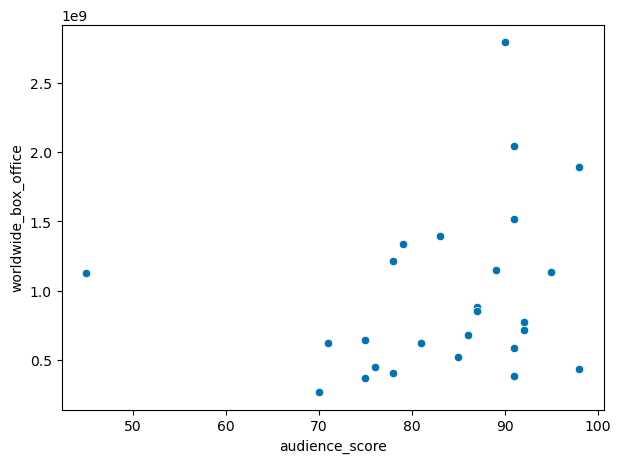

In [117]:
#Does Higher Audience score = More Revenue?¶
plt.figure(figsize=(7,5))
sns.scatterplot(x="audience_score", y="worldwide_box_office", data=marvel_movies)